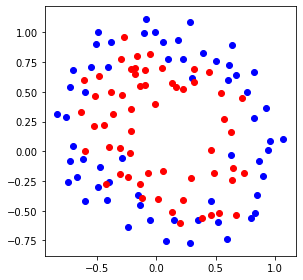

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [4]:
X = []
for i in range(10):
    for k in range(10):
        X = np.append(X, pointX**(i) * pointY**(k))
X = np.reshape(X, (setaN, len(pointX)))

In [5]:
X.shape

(11800,)

In [6]:
X

array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
       -1.46011239e-03, -1.63579513e-20, -3.83263052e-16])

In [21]:
setaN = 100

# o = overfitting , j = just right , u = underfitting

o_seta = np.asarray([0.1] * setaN)
j_seta = np.asarray([0.1] * setaN)
u_seta = np.asarray([0.1] * setaN)

np.reshape(o_seta, (setaN, 1))
np.reshape(o_seta, (setaN, 1))
np.reshape(o_seta, (setaN, 1))

o_err_list = []
j_err_list = []
u_err_list = []

o_accuracy_list = []
j_accuracy_list = []
u_accuracy_list = []

lr = 0.05
epochs = 50000

o_A = None
j_A = None
u_A = None
M = len(pointX)

o_l = 0.001
j_l = 0.1
u_l = 10

for i in range(epochs):
    #forpass
    o_Z = np.dot(o_seta, X)
    j_Z = np.dot(j_seta, X)
    u_Z = np.dot(u_seta, X)
    
    o_A = 1/(1+np.exp(-o_Z))
    j_A = 1/(1+np.exp(-j_Z))
    u_A = 1/(1+np.exp(-u_Z))
    
    o_ERR = -(label-o_A)
    j_ERR = -(label-j_A)
    u_ERR = -(label-u_A)
    
    #backprop
    for k in range(setaN):
        o_seta[k] = (1 - lr * j_l) * o_seta[k] - lr * np.sum(o_ERR * X[k]) / M
        j_seta[k] = (1 - lr * j_l) * j_seta[k] - lr * np.sum(j_ERR * X[k]) / M
        u_seta[k] = (1 - lr * u_l) * u_seta[k] - lr * np.sum(u_ERR * X[k]) / M
    
    #history
    o_accuracy_list.append(np.mean((o_A > 0.5) ==  label))
    j_accuracy_list.append(np.mean((j_A > 0.5) ==  label))
    u_accuracy_list.append(np.mean((u_A > 0.5) ==  label))
    
    o_A = np.clip(o_A, 1e-10, 1-1e-10)
    j_A = np.clip(j_A, 1e-10, 1-1e-10)
    u_A = np.clip(u_A, 1e-10, 1-1e-10)
    
    o_loss = np.sum(-(label*np.log(o_A) + (1-label)*np.log(1-o_A)))/M + o_l / 2 * np.sum(o_seta**2)
    j_loss = np.sum(-(label*np.log(j_A) + (1-label)*np.log(1-j_A)))/M + j_l / 2 * np.sum(j_seta**2)
    u_loss = np.sum(-(label*np.log(u_A) + (1-label)*np.log(1-u_A)))/M + u_l / 2 * np.sum(u_seta**2)
    
    
    o_err_list.append(o_loss)
    j_err_list.append(j_loss)
    u_err_list.append(u_loss)

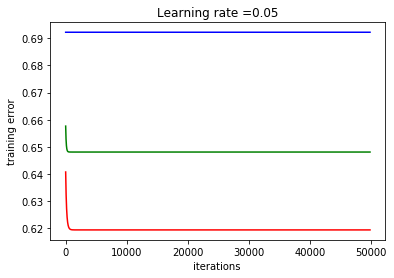

In [24]:
plt.plot(np.squeeze(o_err_list[200:]), color='r')
plt.plot(np.squeeze(j_err_list[200:]), color='g')
plt.plot(np.squeeze(u_err_list[200:]), color='b')
plt.ylabel('training error')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(lr))
plt.show()

In [41]:
print(f"\033[1;30m over-fitting   \033[1;31m{o_l}  \n\033[1;30m just-right      \033[1;32m{j_l} \n\033[1;30m under-fitting    \033[1;34m {u_l}")

 over-fitting   0.001  
 just-right      0.1 
 under-fitting     10
